In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy as sp 
import sklearn as sl 
import nltk as nl 
 

Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
pandas: 2.2.2
numpy: 1.26.4
matplotlib: 3.9.2
scipy: 1.13.1
sklearn: 1.5.1
NLTK: 3.9.1


## Import dataset

In [ ]:
import pandas as pd


df = pd.read_csv('Real Estate Dataset.csv', sep=';')

# df.describe()
# df.info()

# # Print all the columns of the df
# print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name_nsi             15403 non-null  object 
 1   price                15403 non-null  int64  
 2   index                5162 non-null   object 
 3   environment          4132 non-null   object 
 4   quality_of_living    4132 non-null   object 
 5   safety               4132 non-null   object 
 6   transport            4132 non-null   object 
 7   services             4132 non-null   object 
 8   relax                4132 non-null   object 
 9   condition            15076 non-null  object 
 10  area                 14687 non-null  object 
 11  energy_costs         980 non-null    float64
 12  provision            15403 non-null  int64  
 13  certificate          6445 non-null   object 
 14  construction_type    2367 non-null   object 
 15  orientation          1023 non-null  

In [422]:
orientation_count = df.groupby('orientation')['price'].count()
print('Total = ', orientation_count.values.sum())
orientation_count

Total =  1023


orientation
East         157
North         18
Northeast     60
Northwest     55
South        190
Southeast    141
Southwest    219
West         183
Name: price, dtype: int64

## Delete duplicates

In [425]:
rows_before = df.shape[0]
print('Rows before: ', rows_before)

df.drop_duplicates()
rows_after = df.shape[0]
print(str(rows_before - rows_after) + ' duplicate rows deleted.')


Rows before:  15403
0 duplicate rows deleted.


In [426]:
df['condition'] = df['condition'].replace('New building', 'Original condition')
df['condition'].unique()

array(['Original condition', 'Partial reconstruction',
       'Complete reconstruction', nan, 'Under construction',
       'Development project'], dtype=object)

In [427]:
df['certificate'].unique()

array([nan, 'none', 'C', 'G', 'A', 'B', 'D', 'E', 'F'], dtype=object)

## Drop rows where 'price', 'area', 'condition', ' floor' or 'rooms' is null

In [428]:

rows_before = df.shape[0]

df.dropna(axis=0, how='any', subset=['rooms', 'price', 'area', 'condition', 'floor'], inplace=True)

rows_after = df.shape[0]
print(str(rows_before - rows_after) + ' rows deleted, where \'area\', \'rooms\', \'condition\' or \'price\' was null.')
df.shape[0]

7237 rows deleted, where 'area', 'rooms', 'condition' or 'price' was null.


8166

## Drop orentation and energy cost column because of lack of data

In [429]:
df = df.drop(['orientation', 'energy_costs', 'total_floors', 'balkonies', 'loggia', 'index'], axis=1)
print(df.shape[0])

8166


## Replace NaN last_reconstruction and year_built with 'Unknown'


In [430]:
# Drop values smaller than 1800


print(df.shape[0])


df = df.drop(df[((df['year_built'] < 1800) &  (df['year_built'] != -1)) | (df['year_built'] > 2023)].index)
df['year_built'] = df['year_built'].replace(-1, np.nan)
df['year_built'] = df['year_built'].replace(np.nan, df['year_built'].median())

df['last_reconstruction'] = df['last_reconstruction'].fillna(df['year_built'])
df = df.drop(df[df['last_reconstruction'] > 2023].index)
reconstructions = df.groupby(['last_reconstruction'])['last_reconstruction'].count().sort_index(ascending=True)


8166


## Replace construction_type, total_floors nulls with 'Unknown'


In [431]:
df['construction_type'] = df['construction_type'].replace(np.nan, 'Unknown')



In [432]:
df['certificate'] = df['certificate'].replace(np.nan, 'Unknown')


****

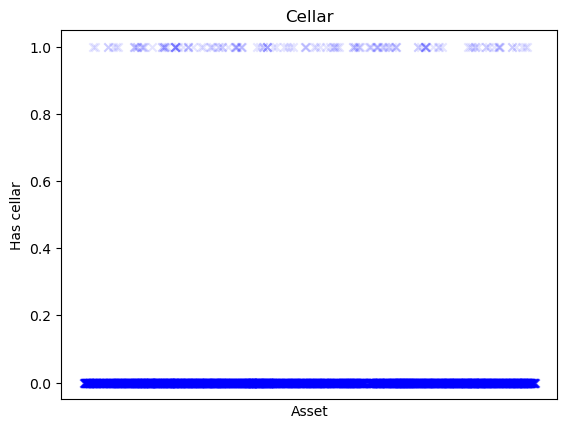

In [433]:

plt.scatter( list(df.index), df['cellar'], color='blue',marker='x', alpha=0.1)
# list(df.index)

# add a title
plt.title("Cellar")

# add a label to the y-axis
plt.ylabel("Has cellar")
plt.xlabel("Asset")
plt.xticks([])

plt.show()

([], [])

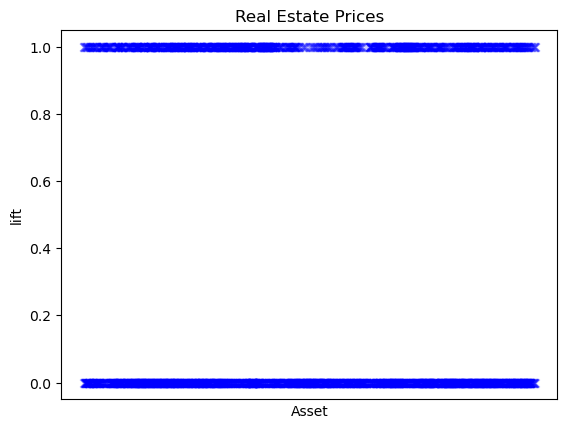

In [434]:
plt.scatter( list(df.index), df['lift'], color='blue',marker='x', alpha=0.1)
# list(df.index)

# add a title
plt.title("Real Estate Prices")

# add a label to the y-axis
plt.ylabel("lift")
plt.xlabel("Asset")
plt.xticks([])

#plt.show()

In [435]:
# Drop where floor is below 0
df = df.drop(df[df['floor'] < 0].index )

## Remaining number of null values

In [436]:

df.isna().sum()

name_nsi                  0
price                     0
environment            5622
quality_of_living      5622
safety                 5622
transport              5622
services               5622
relax                  5622
condition                 0
area                      0
provision                 0
certificate               0
construction_type         0
year_built                0
last_reconstruction       0
floor                     0
lift                      0
cellar                    0
type                      0
rooms                     0
district                  0
dtype: int64

To-do: There are many entries missing. erase?

In [437]:
df = df.drop(df[df['price'] > 2000000].index)

## Rooms

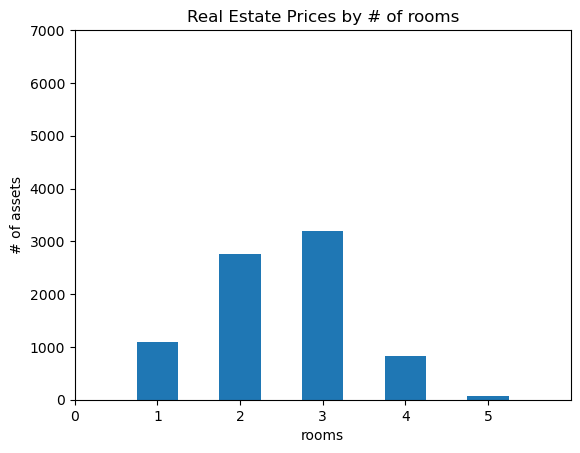

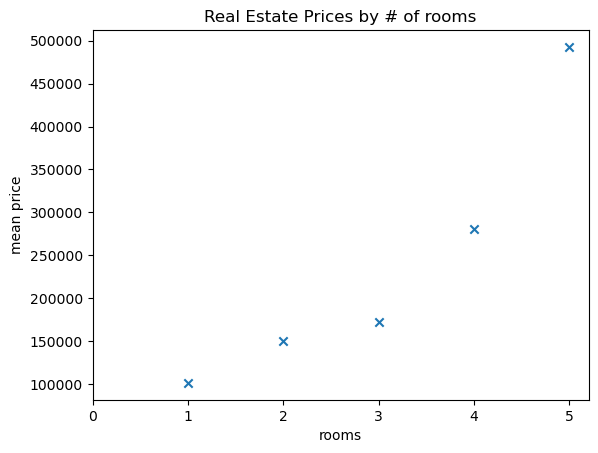

In [438]:
rooms = df.groupby('rooms')['rooms'].count()

plt.bar( list(rooms.index), list(rooms.values), .5)

# add a title
plt.title("Real Estate Prices by # of rooms")

# add a label to the y-axis
plt.ylabel("# of assets")
plt.xlabel("rooms")
plt.axis([0, 6, 0 , 7000])   
plt.xticks([i for i in range(6)]) 

plt.show()

#Mean price

price_per_rooms = df.groupby('rooms')['price'].mean()
plt.scatter(list(price_per_rooms.index), list(price_per_rooms.values), marker='x')

# add a title
plt.title("Real Estate Prices by # of rooms")

plt.ylabel("mean price")
plt.xlabel("rooms")
plt.xticks([i for i in range(6)]) 

plt.show()

## Construction type


/var/folders/g1/1xt42k0x2tx1bq2jl2pkpglr0000gn/T/ipykernel_93601/3686194650.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=9)


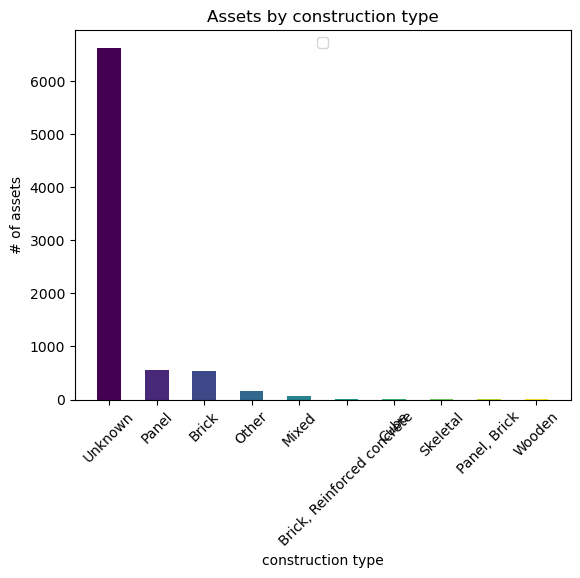

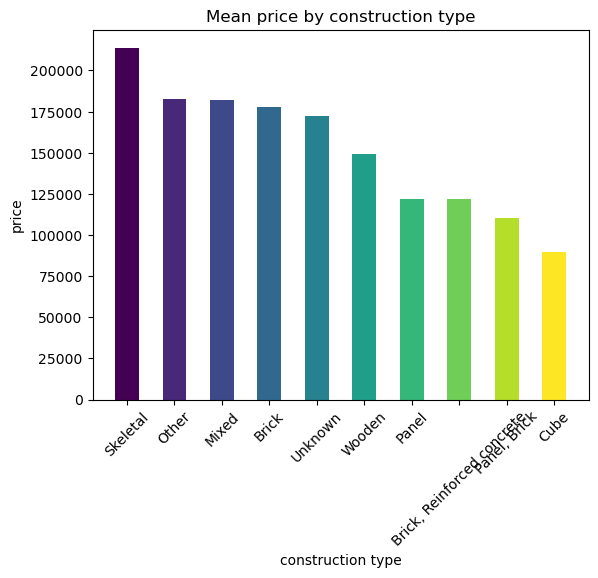

In [439]:
import numpy as np

construction_type_anmount = df.groupby('construction_type')['construction_type'].count().sort_values(ascending=False)

plt.bar( list(construction_type_anmount.index), list(construction_type_anmount.values), .5, color=plt.get_cmap('viridis')(np.linspace(0,1,construction_type_anmount.shape[0])))

plt.legend(loc=9)
# add a title
plt.title("Assets by construction type")

# add a label to the y-axis
plt.ylabel("# of assets")
plt.xlabel("construction type" )
plt.xticks(rotation=45)

plt.show()

construction_type_price = df.groupby('construction_type')['price'].mean().sort_values(ascending=False)

plt.bar( list(construction_type_price.index), list(construction_type_price.values), .5, color=plt.get_cmap('viridis')(np.linspace(0,1,construction_type_anmount.shape[0])))
# add a title
plt.title("Mean price by construction type")

# add a label to the y-axis
plt.ylabel("price")
plt.xlabel("construction type" )
plt.xticks(rotation=45)

plt.show()

## Type

In [440]:
df_types = df.groupby(['type','rooms'])['type'].count().sort_values(ascending=False)



df_types

type                      rooms
3-room apartment          3        3199
2-room apartment          2        2722
1-room apartment          1         895
4-room apartment          4         824
Studio                    1         201
5 or more room apartment  5          75
Two-room apartment        2          33
Name: type, dtype: int64

In [441]:
df = df.drop('type', axis=1)

## Visualization after cleaning

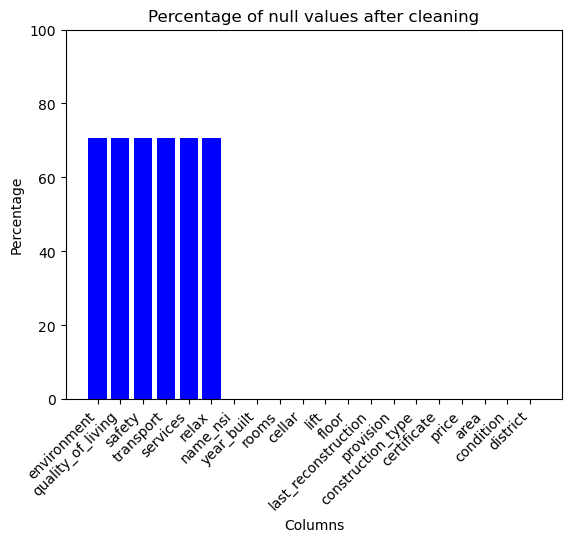

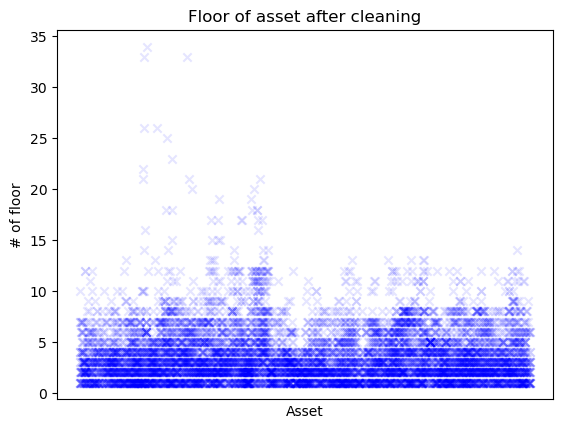

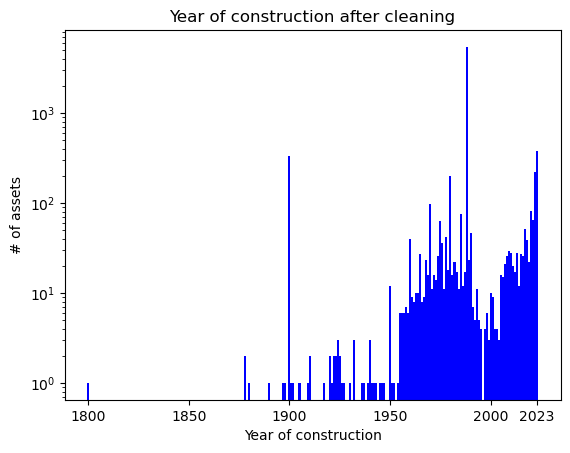

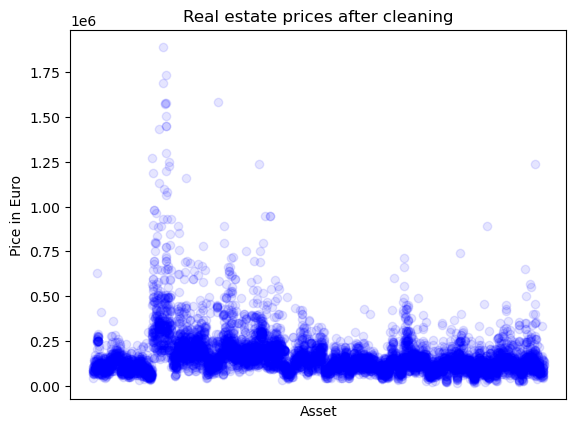

In [442]:
#Remove floors below 0
df_is_null = df.isnull().sum().sort_values(ascending=False)

# Get the percentage of null values for each feature
null_percentages = (df_is_null / df.shape[0]) * 100

plt.bar(list(null_percentages.index), list(null_percentages.values), color='blue')

# add a title
plt.title("Percentage of null values after cleaning")

# add a label to the y-axis
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
plt.show()

# Floor of assets
plt.scatter( list(df.index), df['floor'], color='blue',marker='x', alpha=0.1)
# list(df.index)

# add a title
plt.title("Floor of asset after cleaning")

# add a label to the y-axis
plt.ylabel("# of floor")
plt.xlabel("Asset")
plt.xticks([])


plt.show()

# Year built

df_yb_grouped = df.groupby('year_built')['year_built'].count()

plt.bar( list(df_yb_grouped.index), list(df_yb_grouped.values), 1, color='blue')

# Create an array from 1800 to 2000 in steps of 50
array = np.arange(1800, 2001, 50)
array = np.append(array, 2023)

plt.xticks(array)

plt.title("Year of construction after cleaning")
plt.ylabel("# of assets")
plt.xlabel("Year of construction")
plt.yscale('log')

plt.show()

# Price

plt.scatter( list(df.index), df['price'], color='blue',marker='o', alpha=0.1)
# list(df.index)

# add a title
plt.title("Real estate prices after cleaning")

# add a label to the y-axis
plt.ylabel("Pice in Euro")
plt.xlabel("Asset")
plt.xticks([])

plt.show()

****

## Split data-set


In [443]:
df.to_csv('real_estate_cleaned.csv')

# df_ = pd.read_csv('real_estate_cleaned.csv')

In [444]:
print(df.shape[0])
# df_with_index = df
df_with_index = df.dropna(axis=0, how='any', subset=['quality_of_living', 'safety', 'transport', 'services', 'relax','environment'], inplace=False)
print(df_with_index.shape[0])
df_with_index.to_csv('real_estate_index.csv')

7949
2328


In [445]:
print(df.shape[0])


df_without_index = df.drop(['quality_of_living', 'safety', 'transport', 'services', 'relax','environment'], axis=1)
df_without_index.shape[0]
df_without_index.to_csv('real_estate.csv')

df


7949


,name_nsi,price,environment,quality_of_living,safety,transport,services,relax,condition,area,provision,certificate,construction_type,year_built,last_reconstruction,floor,lift,cellar,rooms,district
2,Štúrovo,107000,NaN,NaN,NaN,NaN,NaN,NaN,Partial reconstruction,40,0,Unknown,Unknown,1988.0,1988.0,3.0,0,0,1,Nové Zámky
3,Štúrovo,105000,NaN,NaN,NaN,NaN,NaN,NaN,Complete reconstruction,76,1,C,Unknown,1988.0,1988.0,4.0,1,0,3,Nové Zámky
4,Štúrovo,82000,NaN,NaN,NaN,NaN,NaN,NaN,Partial reconstruction,63,0,Unknown,Unknown,1988.0,2018.0,2.0,0,0,2,Nové Zámky
9,Štúrovo,74900,NaN,NaN,NaN,NaN,NaN,NaN,Original condition,64,1,Unknown,Unknown,1988.0,1988.0,3.0,1,0,2,Nové Zámky
10,Štúrovo,64900,NaN,NaN,NaN,NaN,NaN,NaN,Original condition,57,0,none,Panel,1988.0,1988.0,7.0,1,0,2,Nové Zámky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15392,Vranov nad Topľou,81000,NaN,NaN,NaN,NaN,NaN,NaN,Partial reconstruction,52,0,C,Panel,1988.0,1988.0,3.0,1,0,2,Vranov nad Topľou
15398,Vranov nad Topľou,118990,NaN,NaN,NaN,NaN,NaN,NaN,Original condition,88,0,Unknown,Unknown,1988.0,1988.0,6.0,1,0,4,Vranov nad Topľou
15399,Vranov nad Topľou,117650,NaN,NaN,NaN,NaN,NaN,NaN,Complete reconstruction,70,0,Unknown,Unknown,1972.0,1972.0,1.0,1,0,3,Vranov nad Topľou
15401,Vranov nad Topľou,139990,NaN,NaN,NaN,NaN,NaN,NaN,Complete reconstruction,138,0,Unknown,Brick,1988.0,1988.0,3.0,1,0,4,Vranov nad Topľou
